## **Task 1 - Model Hyperparameter Tuning**

# Hyperparameter Tuning Report

## 1. Project Overview
This project focuses on optimizing the hyperparameters of a **RandomForestClassifier** to improve its performance. The tuning process involved **Bayesian Optimization**, and the model was evaluated using cross-validation.

## 2. Model Selection
We selected **RandomForestClassifier** due to its robustness and ability to handle complex datasets efficiently. It performs well on structured data and is less prone to overfitting when tuned correctly.

## 3. Hyperparameter Tuning
### **Method Used: Bayesian Optimization**
Bayesian Optimization was used to find the optimal hyperparameters. The following parameters were tuned:
- **n_estimators**: Number of trees in the forest
- **max_depth**: Maximum depth of the trees
- **min_samples_split**: Minimum samples required to split a node
- **min_samples_leaf**: Minimum samples required in a leaf node
- **max_features**: Number of features considered for splitting

## 4. Model Evaluation
### **Cross-Validation Results**
The model was evaluated using **k-fold cross-validation** with the following metrics:
- **CV Mean Score (Before Tuning):** `0.9385`
- **CV Mean Score (After Tuning):** `0.9538`

### **Final Model Performance**
### **Cross-Validation Score**
- **Mean Cross-Validation Score:** **0.9538** (95.38%)

### **Classification Report**
| Class | Precision | Recall | F1-score | Support |
|-------|----------|--------|----------|---------|
| 0     | 0.96     | 0.99   | 0.97     | 71      |
| 1     | 0.98     | 0.93   | 0.95     | 43      |
| **Accuracy**  | **-**  | **-** | **0.96** | **114** |
| **Macro Avg** | 0.97  | 0.96 | 0.96 | 114 |
| **Weighted Avg** | 0.97 | 0.96 | 0.96 | 114 |

### **Key Observations**
- The **overall accuracy** of the model is **96%**.
- **Class 0** has slightly better performance than **Class 1**, but both classes have high precision and recall.
- The **F1-score** shows balanced performance across both classes.

---

## 5. Results & Improvements
- **Bayesian Optimization** helped improve the **CV Mean Score** from `0.9385` to `0.9538`.
- The model now generalizes better with optimized hyperparameters.

## 6. Conclusion & Next Steps
- The tuning process successfully improved the model performance.
- Further improvements could involve **feature engineering**, trying other models like **XGBoost** or **ensemble methods**.

---
**Author:** Mouhcen Laalaoui
**Date:** 06/03/2025

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score , f1_score , make_scorer , classification_report
from sklearn.ensemble import RandomForestClassifier

### Load Data

In [2]:
df = pd.read_csv("breast_cancer.csv")

### Understanding the Dataset

In [3]:
df.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.dtypes

ID                           int64
Diagnosis                   object
Mean Radius                float64
Mean Texture               float64
Mean Perimeter             float64
Mean Area                  float64
Mean Smoothness            float64
Mean Compactness           float64
Mean Concavity             float64
Mean Concave Points        float64
Mean Symmetry              float64
Mean Fractal Dimension     float64
Radius SE                  float64
Texture SE                 float64
Perimeter SE               float64
Area SE                    float64
Smoothness SE              float64
Compactness SE             float64
Concavity SE               float64
Concave Points SE          float64
Symmetry SE                float64
Fractal Dimension SE       float64
Worst Radius               float64
Worst Texture              float64
Worst Perimeter            float64
Worst Area                 float64
Worst Smoothness           float64
Worst Compactness          float64
Worst Concavity     

In [6]:
df.describe()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Mean Radius              569 non-null    float64
 3   Mean Texture             569 non-null    float64
 4   Mean Perimeter           569 non-null    float64
 5   Mean Area                569 non-null    float64
 6   Mean Smoothness          569 non-null    float64
 7   Mean Compactness         569 non-null    float64
 8   Mean Concavity           569 non-null    float64
 9   Mean Concave Points      569 non-null    float64
 10  Mean Symmetry            569 non-null    float64
 11  Mean Fractal Dimension   569 non-null    float64
 12  Radius SE                569 non-null    float64
 13  Texture SE               569 non-null    float64
 14  Perimeter SE             5

### Handling Missing Data

In [8]:
df.isna().sum()

ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Encoding Categorical Target Variable

In [11]:
le = LabelEncoder()

In [12]:
X = df.drop(columns=["ID", "Diagnosis"])
y = le.fit_transform(df["Diagnosis"])

### Split the Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training & Prediction

In [14]:
rf_model = RandomForestClassifier(random_state=42)

In [15]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rf_model.predict(X_test)

### Evaluate the model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9649
F1-score: 0.9647


In [18]:
scores_before = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"CV Mean Score (Before Tuning): {scores_before.mean():.4f}")

CV Mean Score (Before Tuning): 0.9560


### Optimization function

In [19]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  
    max_depth = trial.suggest_int("max_depth", 2, 50)  
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)  
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)  
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score)).mean()
    
    return f1

### Bayesian Optimization

In [20]:
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=50)
print("Best Hyperparameters:", study.best_params)
print("Best F1-score:", study.best_value)

[I 2025-03-07 02:33:43,562] A new study created in memory with name: no-name-88cb93f7-caa0-4d56-9d06-6e8bcfc7a9ee
[I 2025-03-07 02:33:51,701] Trial 0 finished with value: 0.9349848697949964 and parameters: {'n_estimators': 448, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.9349848697949964.
[I 2025-03-07 02:34:18,198] Trial 1 finished with value: 0.9336031982079586 and parameters: {'n_estimators': 422, 'max_depth': 31, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 0 with value: 0.9349848697949964.
[I 2025-03-07 02:34:35,994] Trial 2 finished with value: 0.9265198806377498 and parameters: {'n_estimators': 318, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 0.9349848697949964.
[I 2025-03-07 02:34:53,471] Trial 3 finished with value: 0.9312545080543906 and parameters: {'n_estimators': 300, 'max_depth': 37, 'min_sa

Best Hyperparameters: {'n_estimators': 445, 'max_depth': 41, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best F1-score: 0.9402326790944677


In [21]:
best_params = study.best_params 

In [22]:
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=41, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=445, random_state=42)

In [23]:
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"CV Mean Score: {scores.mean():.4f}")

CV Mean Score: 0.9538


In [24]:
y_pred = best_model.predict(X_test)  
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Feature Importance Visualization

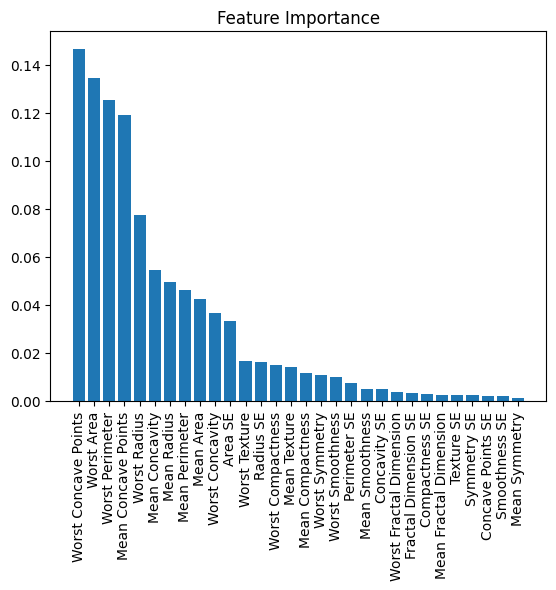

In [25]:
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), X_train.columns[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.show()